In [8]:
from sklearn.datasets import load_iris
import pandas as pd

df = load_iris()
df.data = pd.DataFrame(df.data)
df = df.data.iloc[:,[1,2,3]]

In [9]:
df

,1,2,3
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [10]:
def new_centroids(k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis = 1)

In [11]:
new_centroids(3)

,0,1,2
1,3.4,3.4,3.1
2,3.3,4.5,4.7
3,2.1,2.4,0.2


In [14]:
import numpy as  np
def assign(df,centroids):
    dist = centroids.apply(lambda x:np.sqrt((df-x)**2).sum(axis = 1))
    return dist.idxmin(axis = 1)

In [15]:
assign(df,new_centroids(3))

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    1
147    1
148    2
149    1
Length: 150, dtype: int64

In [19]:
def next_cent(df,labels):
    return df.groupby(labels).apply(lambda x: np.mean(x)).T

In [20]:
next_cent(df,assign(df,new_centroids(3)))

C:\Users\karu0\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\karu0\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\karu0\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0,1,2
1,3.428,2.742593,3.023913
2,1.462,4.753704,5.084783
3,0.246,1.690741,1.658696


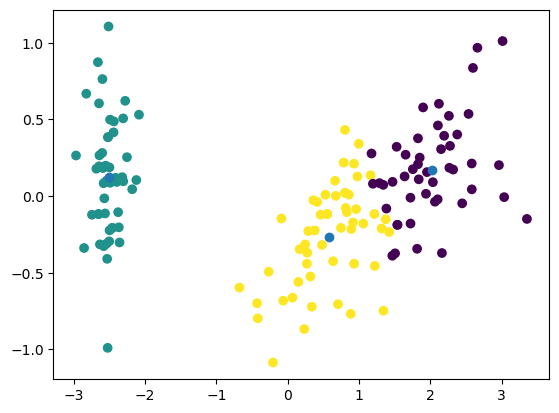

In [24]:
from sklearn.decomposition import PCA
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot_clusters(df,labels,centroids,iteration):
    pca = PCA(n_components=2)
    df1 = pca.fit_transform(df)
    ct = pca.transform(centroids.T)
    clear_output(wait=True)
    
    plt.scatter(df1[:,0],df1[:,1],c = labels)
    plt.scatter(ct[:,0],ct[:,1])
    plt.show()
    
maxi = 100
ite = 1
centroids = new_centroids(3)
old = pd.DataFrame()

while maxi>ite and not centroids.equals(old):
    old = centroids
    
    labels = assign(df,centroids)
    centroids = next_cent(df,labels)
    plot_clusters(df,labels,centroids,ite)
    ite += 1

In [25]:
print(ite)

10


In [26]:
print(centroids)

          0      1         2
1  3.019149  3.428  2.741509
2  5.597872  1.462  4.292453
3  2.053191  0.246  1.341509


In [27]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\karu0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karu0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karu0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karu0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

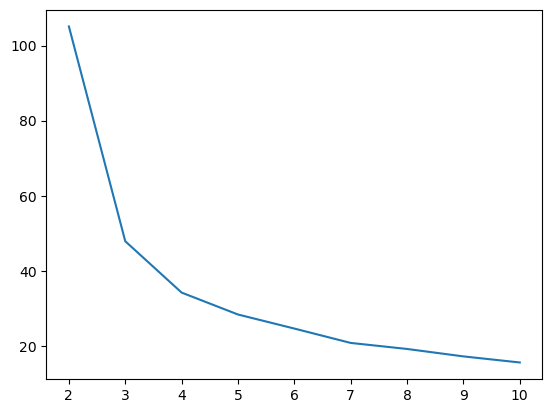

In [28]:
plt.plot(range(2,11),wcss)

In [29]:
km = KMeans(n_clusters=4,random_state=0)
y = km.fit_predict(df)

C:\Users\karu0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karu0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


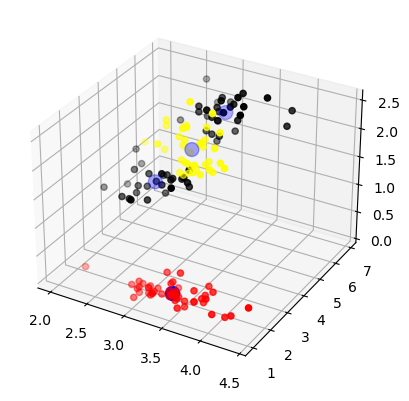

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df.iloc[y==0,0],df.iloc[y==0,1],df.iloc[y==0,2],c = 'red')
ax.scatter(df.iloc[y==1,0],df.iloc[y==1,1],df.iloc[y==1,2],c = 'yellow')
ax.scatter(df.iloc[y==2,0],df.iloc[y==2,1],df.iloc[y==2,2],c = 'black')
ax.scatter(df.iloc[y==3,0],df.iloc[y==3,1],df.iloc[y==3,2],c = 'black')
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],s = 100,c = 'blue')